# Assignment 2 - Alexander Ilyin CSE 258

## Diagnostics 
### Part 1

In [2]:
import pandas as pd
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

d = open("data/5year.arff", "r")
while not "@data" in d.readline():
    pass

dataset = []
for line in d:
    if "?" in line:
        continue
    line = line.split(",")
    values = [1] + [float(x) for x in line]
    values[-1] = values[-1] > 0
    dataset.append(values)

X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

reg = LogisticRegression()
reg.fit(X, y)

predictions = reg.predict(X)
correctPredictions = predictions == y
accuracy = sum(correctPredictions) / len(correctPredictions)


def find_ber(predictions: list, y: list):
    true_positive = 0
    false_negative = 0
    true_negative = 0
    false_positive = 0
    balanced_error_rate = 0
    for i in range(len(predictions)):
        if predictions[i] == True and y[i] == True:
            true_positive = true_positive + 1
    for i in range(len(predictions)):
        if predictions[i] == False and y[i] == True:
            false_negative = false_negative + 1
    t_p_r = true_positive / (true_positive + false_negative)

    for i in range(len(predictions)):
        if predictions[i] == False and y[i] == False:
            true_negative = true_negative + 1
    for i in range(len(predictions)):
        if predictions[i] == True and y[i] == False:
            false_positive = false_positive + 1
    t_n_r = true_negative / (true_negative + false_positive)
    balanced_error_rate = 1 - (0.5 * (t_p_r + t_n_r))

    return balanced_error_rate

In [3]:
print(f"The accuracy of the logistic regression is {accuracy}")
print(f"The balanced error rate of the regression is {find_ber(predictions, y)}")

The accuracy of the logistic regression is 0.9666776641372484
The balanced error rate of the regression is 0.48090427704028005


### Part 2

In [4]:
reg = LogisticRegression(class_weight="balanced")
reg.fit(X, y)

predictions = reg.predict(X)
correctPredictions = predictions == y
accuracy = sum(correctPredictions) / len(correctPredictions)

In [5]:
print(f"The accuracy of the logistic regression is {accuracy}")
print(f"The balanced error rate of the regression is {find_ber(predictions, y)}")

The accuracy of the logistic regression is 0.7815902342461234
The balanced error rate of the regression is 0.20763293367876345


### Part 3

In [33]:
import random

random.shuffle(dataset)
X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

X_train = X[: int(0.5 * len(X))]
X_val = X[int(0.5 * len(X)) : int(0.75 * len(X))]
X_test = X[int(0.75 * len(X)) :]

y_train = y[: int(0.5 * len(y))]
y_val = y[int(0.5 * len(y)) : int(0.75 * len(y))]
y_test = y[int(0.75 * len(y)) :]

reg = LogisticRegression(class_weight="balanced")
reg.fit(X_train, y_train)
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)
predictions_val = reg.predict(X_val)

correctPredictions_train = predictions_train == y_train
correctPredictions_test = predictions_test == y_test
correctPredictions_val = predictions_val == y_val

accuracy_train = sum(correctPredictions_train) / len(correctPredictions_train)
accuracy_test = sum(correctPredictions_test) / len(correctPredictions_test)
accuracy_val = sum(correctPredictions_val) / len(correctPredictions_val)

In [34]:
print(
    f"Training accuracy = {accuracy_train}, Testing accuracy = {accuracy_test}, Validation accuracy = {accuracy_val}"
)

Training accuracy = 0.8171617161716171, Testing accuracy = 0.7810026385224275, Validation accuracy = 0.7849604221635884


In [35]:
print(f"BER for training set is {find_ber(predictions_train, y_train)}")
print(f"BER for test set is {find_ber(predictions_test, y_test)}")
print(f"BER for validation set is {find_ber(predictions_val, y_val)}")

BER for training set is 0.19112627986348119
BER for test set is 0.27429609445958225
BER for validation set is 0.19750489236790614


### Part 4

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

train_ber = []
test_ber = []
val_ber = []
c_list = []

random.shuffle(dataset)

for i in range(-4, 5):
    X = [values[:-1] for values in dataset]
    y = [values[-1] for values in dataset]

    X_train = X[: int(0.5 * len(X))]
    X_val = X[int(0.5 * len(X)) : int(0.75 * len(X))]
    X_test = X[int(0.75 * len(X)) :]

    y_train = y[: int(0.5 * len(y))]
    y_val = y[int(0.5 * len(y)) : int(0.75 * len(y))]
    y_test = y[int(0.75 * len(y)) :]

    reg = LogisticRegression(class_weight="balanced", C=10**i)
    c_list.append(i)
    reg.fit(X_train, y_train)
    predictions_train = reg.predict(X_train)
    predictions_test = reg.predict(X_test)
    predictions_val = reg.predict(X_val)

    train_ber.append(find_ber(predictions_train, y_train))
    test_ber.append(find_ber(predictions_test, y_test))
    val_ber.append(find_ber(predictions_val, y_val))

   Training_BER  Test_BER  Validation_BER  Regularization_Exponent
0      0.244962  0.249901        0.357479                       -4
1      0.223724  0.203620        0.275081                       -3
2      0.179843  0.205644        0.226694                       -2
3      0.181554  0.172859        0.240760                       -1
4      0.212412  0.202945        0.279208                        0
5      0.246007  0.206994        0.318343                        1
6      0.198019  0.199571        0.290522                        2
7      0.218249  0.201596        0.277832                        3
8      0.204883  0.203620        0.258264                        4


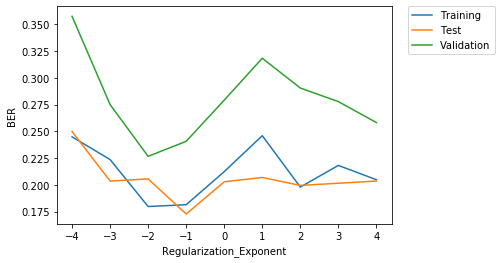

In [86]:
accuracy_df = pd.DataFrame(
    list(zip(train_ber, test_ber, val_ber, c_list)),
    columns=["Training_BER", "Test_BER", "Validation_BER", "Regularization_Exponent"],
)
print(accuracy_df)
sns.lineplot(x="Regularization_Exponent", y="Training_BER", data=accuracy_df, label='Training')
sns.lineplot(x="Regularization_Exponent", y="Test_BER", data=accuracy_df, label='Test')
sns.lineplot(x="Regularization_Exponent", y="Validation_BER", data=accuracy_df, label='Validation')
plt.ylabel('BER')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [109]:
accuracy_df[accuracy_df.Validation_BER == accuracy_df.Validation_BER.min()]

,Training_BER,Test_BER,Validation_BER,Regularization_Exponent
2,0.179843,0.205644,0.226694,-2


While we were not implementing a typical regularization pipline, our goal was to minimize validation BER and we can say that the exponent -2 accomplished this (C= 10^-2). This means that the optimal C value for our dataset is C=10^-2. In contrast to most machine learning problems, we are not using this model for further testing on unseen data. For this reason, we are simply using a regularization pipeline to mimic parameter tuning. This C value is subject to change, since our dataset with be randomized every time we run the above code chunk. 

### Part 5

In [118]:
random.shuffle(dataset)
X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

X_train = X[: int(0.5 * len(X))]
X_val = X[int(0.5 * len(X)) : int(0.75 * len(X))]
X_test = X[int(0.75 * len(X)) :]

y_train = y[: int(0.5 * len(y))]
y_val = y[int(0.5 * len(y)) : int(0.75 * len(y))]
y_test = y[int(0.75 * len(y)) :]

reg = LogisticRegression(class_weight="balanced", C=1.0)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

f_beta_list=[]
f_beta_list.append(fbeta_score(y_test, predictions, beta=.1))
f_beta_list.append(fbeta_score(y_test, predictions, beta=1))                
f_beta_list.append(fbeta_score(y_test, predictions, beta=10))

In [119]:
f_beta_list

[0.08350292546425846, 0.143646408839779, 0.5134923738756355]

### Part 6

In [166]:
X_train = X[: int(0.5 * len(X))]
X_val = X[int(0.5 * len(X)) : int(0.75 * len(X))]
X_test = X[int(0.75 * len(X)) :]

y_train = y[: int(0.5 * len(y))]
y_val = y[int(0.5 * len(y)) : int(0.75 * len(y))]
y_test = y[int(0.75 * len(y)) :]

weights = [1.0] * len(y_train)
reg = LogisticRegression(C=1.0, solver='lbfgs')
reg.fit(X_train, y_train, sample_weight=weights)
predictions = reg.predict(X_test)

f_score_list = []
f1_unweighted = fbeta_score(y_test, predictions, beta=1)
f10_unweighted = fbeta_score(y_test, predictions, beta=10)
f_score_list.append(f1_unweighted)
f_score_list.append(f10_unweighted)

In [167]:
print(f"The unweighted F1 score is {f_score_list[0]} while F10 score is {f_score_list[1]}")

The unweighted F1 score is 0.07142857142857142 while F10 score is 0.04201331114808652


In [176]:
from sklearn.metrics import fbeta_score

weight_list = []
f1_score_weighted = []
f10_score_weighted = []
for x in range(2, 31):
    weighted = [float(x) if y_train[i]==True else float(1) for i in range(len(y_train))]
    mod = LogisticRegression(C=1, solver="lbfgs")
    mod.fit(X_train, y_train, sample_weight=weighted)
    predictions_weights = mod.predict(X_test)

    f1_weighted = fbeta_score(y_test, predictions_weights, beta=1)
    f10_beta_weighted = fbeta_score(y_test, predictions_weights, beta=10)
    weight_list.append(x)
    f1_score_weighted.append(f1_weighted)
    f10_score_weighted.append(f10_beta_weighted)

In [177]:
f_score = pd.DataFrame(
    list(zip(weight_list, f1_score_weighted, f10_score_weighted)),
    columns=["Weight", "F1_Score", "F10_Score"],)

In [178]:
f_score

,Weight,F1_Score,F10_Score
0,2,0.114286,0.083783
1,3,0.108108,0.083713
2,4,0.095238,0.083540
3,5,0.095238,0.083540
4,6,0.117647,0.124845
5,7,0.156863,0.166461
6,8,0.126984,0.165642
7,9,0.121212,0.165438
8,10,0.121212,0.165438
9,11,0.111111,0.165033


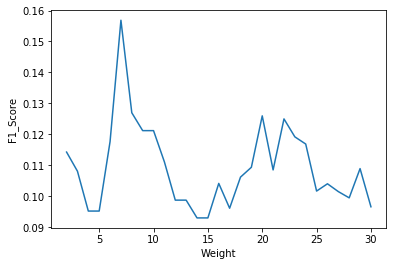

In [179]:
sns.lineplot(x="Weight", y="F1_Score", data=f_score)

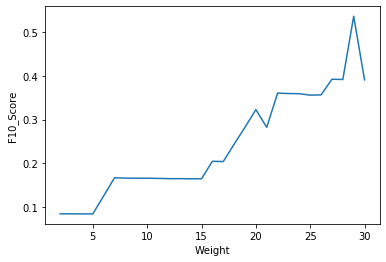

In [180]:
sns.lineplot(x="Weight", y="F10_Score", data=f_score)

In [182]:
f_score[f_score.F1_Score>f_score_list[0]]

,Weight,F1_Score,F10_Score
0,2,0.114286,0.083783
1,3,0.108108,0.083713
2,4,0.095238,0.083540
3,5,0.095238,0.083540
4,6,0.117647,0.124845
5,7,0.156863,0.166461
6,8,0.126984,0.165642
7,9,0.121212,0.165438
8,10,0.121212,0.165438
9,11,0.111111,0.165033


In [183]:
f_score[f_score.F10_Score>f_score_list[1]]

,Weight,F1_Score,F10_Score
0,2,0.114286,0.083783
1,3,0.108108,0.083713
2,4,0.095238,0.083540
3,5,0.095238,0.083540
4,6,0.117647,0.124845
5,7,0.156863,0.166461
6,8,0.126984,0.165642
7,9,0.121212,0.165438
8,10,0.121212,0.165438
9,11,0.111111,0.165033


Based on the two code chunks above, the weights that produce the better F1 and F10 scores are listed above. For F1 score, using any weight 2-30 for the positive values gives us better F1 scores than the unweighted regression. For F10 score, also using weights 2-30 gives us better results than unweighted regression. This proves that placing higher weights on positive results will improve the F Score metric.  These results are subject to change, based on the shuffling of the dataset. 

## Dimensionality Reduction

### Part 7

In [139]:
import numpy as np
from sklearn.decomposition import PCA

random.shuffle(dataset)

pca = PCA(n_components=65)
pca.fit(X)
print(pca.components_[0])

[-6.08910787e-21  9.70476011e-08 -3.69821441e-07  1.02656604e-06
  4.89745625e-06  1.34942085e-03  4.93170366e-08  8.35697514e-07
  5.47241014e-06 -5.96020830e-07  4.22958437e-07  2.05459297e-07
  1.21170024e-06 -2.30731379e-06  8.35527381e-07 -1.62911250e-03
  1.05785352e-06  5.96551609e-06  7.72995795e-07  3.91015428e-07
  3.98561127e-05 -5.99412826e-06  1.83216244e-07  3.54088185e-07
  6.30842823e-07  8.68448238e-07  9.37757750e-07 -3.45047221e-05
  1.57866730e-05  3.32465325e-06 -1.46945516e-06  3.74894515e-07
 -4.36544058e-04  4.28529164e-06 -1.59760488e-06  1.59698599e-07
 -8.68508559e-07 -1.58176832e-03  1.76769329e-07  1.91438109e-07
  2.27276272e-06 -1.16054959e-06  2.70851120e-07  5.89735234e-05
  1.91161378e-05 -1.43715558e-06  3.63368696e-06 -1.59272504e-04
  2.27176022e-07  3.53134739e-07  4.10151962e-06 -7.50699312e-07
 -1.17035208e-06 -7.25503284e-07  1.57717870e-05  9.99996365e-01
  2.00525477e-07  1.31817918e-07 -2.65684695e-07 -8.44226826e-08
 -1.15381299e-04 -8.55290

### Part 8

In [150]:
random.shuffle(dataset)

pca = PCA(n_components=65)
pca.fit(X)

X_train = X[: int(0.5 * len(X))]
X_val = X[int(0.5 * len(X)) : int(0.75 * len(X))]
X_test = X[int(0.75 * len(X)) :]

Xpca_train = np.matmul(X_train, pca.components_.T)
Xpca_val = np.matmul(X_val, pca.components_.T)
Xpca_test = np.matmul(X_test, pca.components_.T)
y_train = y[: int(0.5 * len(y))]

y_val = y[int(0.5 * len(y)) : int(0.75 * len(y))]
y_test = y[int(0.75 * len(y)) :]

components_list = []
BER_test = []
BER_val = []
for n in range(5, 31, 5):
    Xpca_train_reduced = [x[:n] for x in Xpca_train]
    Xpca_test_reduced = [x[:n] for x in Xpca_test]
    Xpca_val_reduced = [x[:n] for x in Xpca_val]
    
    reg = LogisticRegression(class_weight="balanced", C=1)
    reg.fit(Xpca_train_reduced, y_train)
    predictions_test = reg.predict(Xpca_test_reduced)
    predictions_val = reg.predict(Xpca_val_reduced)

    BER_test.append(find_ber(predictions_test, y_test))
    BER_val.append(find_ber(predictions_val, y_val))
    components_list.append(n)

In [151]:
components_ber_df = pd.DataFrame(
    list(zip(components_list, BER_test, BER_val)),
    columns=["N_Components", "Test_BER", "Val_BER"],
)

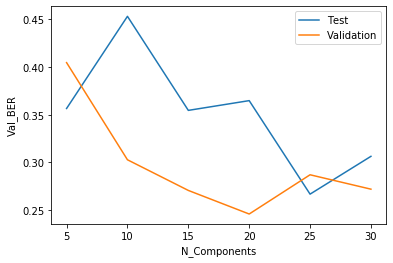

In [152]:
sns.lineplot(x="N_Components", y="Test_BER", data=components_ber_df, label='Test')
sns.lineplot(x="N_Components", y="Val_BER", data=components_ber_df, label='Validation')
plt.legend()

In [153]:
components_ber_df

,N_Components,Test_BER,Val_BER
0,5,0.356608,0.404697
1,10,0.453224,0.302832
2,15,0.354621,0.270685
3,20,0.364839,0.245959
4,25,0.266803,0.287100
5,30,0.306426,0.272002


In [154]:
components_ber_df[components_ber_df.Val_BER == components_ber_df.Val_BER.min()]

,N_Components,Test_BER,Val_BER
3,20,0.364839,0.245959


For number of components in range 5 - 30, it seems that 20 components gives us the minimum validation BER. Since the PCA algorithm is not able to read our features, it is hard to draw valuable conclusions about the "usefulness" of the lables themselves. However, from this result, we can draw the conclusion that using 30 dimensions gave us an optimal result. 